In [1]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [2]:
# 构造训练集和测试集，训练时从训练集中划分验证集
import csv
import os
import math
import numpy as np

def class_2(infile,file1, file2,num):
    train_output_file = open(file1, 'w',newline='')
    test_output_file = open(file2, 'w',newline='')
    train_writer_file = csv.writer(train_output_file)
    test_writer_file = csv.writer(test_output_file)
    #train_writer_file.writerow(["id","id_num","id_dis","last_id","last_interval","interval","data0","data1","data2","data3","data4","data5","data6","data7","data_c","data_last","isFirst","class"])
    train_writer_file.writerow(["id","data0","data1","data2","data3","data4","data5","data6","data7","class"])
    #test_writer_file.writerow(["id","id_num","id_dis","last_id","last_interval","interval","data0","data1","data2","data3","data4","data5","data6","data7","data_c","data_last","isFirst","class"])
    test_writer_file.writerow(["id","data0","data1","data2","data3","data4","data5","data6","data7","class"])

    currentNum=0
    trainNum=0.7*num
    testNum=0.3*num

    print(infile)
    with open(infile, 'r') as f:
        reader=csv.reader(f)
        for row in reader:
            # 跳过第一行
            if row[0] == 'id':
                continue
            if currentNum < trainNum:
                if row[-1] == 'R':
                    train_writer_file.writerow([row[0],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],'T0'])
                else:
                    train_writer_file.writerow([row[0],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],'T1']) # Fuzzy:1
            elif currentNum < trainNum + testNum:
                if row[-1] == 'R':
                    test_writer_file.writerow([row[0],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],'T0'])
                else:
                    test_writer_file.writerow([row[0],row[6],row[7],row[8],
                                      row[9],row[10],row[11],row[12],row[13],'T1']) # Fuzzy:1
            else:
                break
            currentNum=currentNum+1
    currentNum=0
    f.close()

In [9]:
class_2('Fuzzy3.csv','Fuzzy_train_final_1.csv','Fuzzy_test_final_1.csv',500000)
class_2('DoS3.csv','DoS_train_final_1.csv','DoS_test_final_1.csv',500000)
class_2('SpoofingGEAR3.csv','SpoofingGEAR3_train_final_1.csv','SpoofingGEAR3_test_final_1.csv',500000)

Fuzzy3.csv
DoS3.csv
SpoofingGEAR3.csv


In [12]:
# 构造训练集和测试集，训练时从训练集中划分验证集
# 训练集：4个数据集各取30万条，标签：正常0，Fuzzy1，Dos2，Spoofing3
# 测试集：4个数据集各取10万条
import csv
import os
import math
import numpy as np

train_output_file = open('./multiply_train_final.csv', 'w',newline='')
test_output_file = open('./multiply_test_final.csv', 'w',newline='')
train_writer_file = csv.writer(train_output_file)
test_writer_file = csv.writer(test_output_file)
train_writer_file.writerow(["id",
                     "data0","data1","data2","data3","data4","data5","data6","data7","class"])
test_writer_file.writerow(["id",
                     "data0","data1","data2","data3","data4","data5","data6","data7","class"])

currentNum=0
trainNum=300000
testNum=100000

print("1.Fuzzy")
with open('Fuzzy3.csv', 'r') as f:
    reader=csv.reader(f)
    for row in reader:
        # 跳过第一行
        if row[0] == 'id':
            continue
        if currentNum < trainNum:
            if row[-1] == 'R':
                train_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T0'])
            else:
                train_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T1']) # Fuzzy:1
        elif currentNum < trainNum + testNum:
            if row[-1] == 'R':
                test_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T0'])
            else:
                test_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T1']) # Fuzzy:1
        else:
            break
        currentNum=currentNum+1
currentNum=0
f.close()

print("2.DoS")
with open('DoS3.csv', 'r') as f:
    reader=csv.reader(f)
    for row in reader:
        # 跳过第一行
        if row[0] == 'id':
            continue
        if currentNum < trainNum:
            if row[-1] == 'R':
                train_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T0'])
            else:
                train_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T2']) # DoS:2
        elif currentNum < trainNum + testNum:
            if row[-1] == 'R':
                test_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T0'])
            else:
                test_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T2']) # DoS:2
        else:
            break
        currentNum=currentNum+1
currentNum=0
f.close()

print("3.SpoofingGEAR")
with open('SpoofingGEAR3.csv', 'r') as f:
    reader=csv.reader(f)
    for row in reader:
        # 跳过第一行
        if row[0] == 'id':
            continue
        if currentNum < trainNum:
            if row[-1] == 'R':
                train_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T0'])
            else:
                train_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T3']) # Spoofing: 3
        elif currentNum < trainNum + testNum:
            if row[-1] == 'R':
                test_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T0'])
            else:
                test_writer_file.writerow([row[0],row[6],row[7],row[8],
                                  row[9],row[10],row[11],row[12],row[13],'T3']) # Spoofing: 3
        else:
            break
        currentNum=currentNum+1
currentNum=0
f.close()

train_output_file.close()
test_output_file.close()
print("done")

1.Fuzzy
2.DoS
3.SpoofingGEAR
done


In [19]:
# 训练并确定模型，并保存
# 训练过程结果可不输出
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
from keras.layers import LSTM, Dense, Activation,Input,core,Dropout
from keras.models import Model
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# 读取CSV数据集，并拆分为训练集和测试集
# 该函数的传入参数为CSV_FILE_PATH: csv文件路径

def TP(y_true,y_pred):
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    return TP

def TN(y_true,y_pred):
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    return TN

def FP(y_true,y_pred):
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    return FP

def FN(y_true,y_pred):
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    return FN

class LossHistory(K.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

def load_data(CSV_FILE_PATH, size1, size2):
    CAN = pd.read_csv(CSV_FILE_PATH)
    target_var = 'class'  # 目标变量
    # 数据集的特征
    features = list(CAN.columns)
    features.remove(target_var)
    #features.remove('id_dis')
    # 目标变量的类别
    Class = CAN[target_var].unique()
    # 目标变量的类别字典
    Class_dict = dict(zip(Class, range(len(Class))))
    # 增加一列target, 将目标变量进行编码
    CAN['target'] = CAN[target_var].apply(lambda x: Class_dict[x])
    # 对目标变量进行0-1编码(One-hot Encoding)
    lb = LabelBinarizer()
    lb.fit(list(Class_dict.values()))
    transformed_labels = lb.transform(CAN['target'])
    y_bin_labels = []  # 对多分类进行0-1编码的变量
    for i in range(transformed_labels.shape[1]):
        y_bin_labels.append('y' + str(i))
        CAN['y' + str(i)] = transformed_labels[:, i]
    # 将数据集分为训练集和验证集
    train_x, val_x, train_y, val_y = train_test_split(CAN[features], CAN[y_bin_labels], \
                                                        train_size=size1, test_size=size2, shuffle=False, random_state=0) # shuffle=True, stratify=None
    print(type(Class_dict))
    print(Class_dict)
    return train_x, val_x, train_y, val_y, Class_dict

def train_and_test(file1,file2,model1):
    # 0. 开始
    print("\nCAN dataset using Keras/TensorFlow ")
    np.random.seed(4)
    tf.random.set_seed(13)

    # 1. 读取CSV数据集
    print("Loading CAN data into memory")
    CSV_FILE_PATH = file1
    train_x, val_x, train_y, val_y, Class_dict = load_data(CSV_FILE_PATH, 0.9, 0.1)
    #train_x = train_x.values.reshape(train_x.shape[0],1,16)
    #val_x = val_x.values.reshape(val_x.shape[0],1,16)
    train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                                31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
    print(train_y.shape)
    val_y=val_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                       train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                           train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                           train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                           train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                           train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                           train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                           train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                           train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                           train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
    print(val_y.shape)
    train_x = series_to_supervised(train_x, 49)
    val_x = series_to_supervised(val_x, 49)
    train_x = train_x.values.reshape(train_x.shape[0],50,9)
    print(train_x.shape)
    val_x = val_x.values.reshape(val_x.shape[0],50,9)
    print(val_x.shape)


    # 2. 定义模型
    init = K.initializers.glorot_uniform(seed=1)
    simple_adam = K.optimizers.Adam()
    model = K.models.Sequential()
    model.add(LSTM(units=256,input_shape=(50, 9),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, kernel_initializer=init, activation='linear'))
    model.add(Dense(1,activation='tanh'))
    #model.add(Activation('tanh'))
    #model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
    #model.add(K.layers.Dense(units=2, kernel_initializer=init, activation='sigmoid'))
    #model.compile(loss='categorical_crossentropy', optimizer=simple_adam, metrics=['accuracy'])'''
    #rmsprop = RMSprop(lr=0.01)
    #model.compile(loss='mae', optimizer='rmsprop', metrics=['accuracy',TP,TN,FP,FN])
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    #print(model.summary())
    # 3. 训练模型
    b_size = 1024
    max_epochs = 3
    # max_epochs = 2
    history = LossHistory()
    print("Starting training ")
    h = model.fit(train_x, train_y, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1,callbacks=[history], validation_data=(val_x, val_y))

    # 展示训练结果
    import matplotlib.pyplot as plt
    acc = h.history['accuracy']
    loss = h.history['loss']
    val_acc = h.history['val_accuracy']
    val_loss = h.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

    # 根据验证集最小损失确定迭代轮数，确定并保存模型
    print(val_loss)
    print(len(val_loss))
    min_num = val_loss[0]
    min_index = 0
    for i in range(len(val_loss)):
        if val_loss[i] < min_num:
            min_num = val_acc[i]
            min_index = i

    print(min_num,min_index)

    h = model.fit(train_x, train_y, batch_size=b_size, epochs=min_index+1, shuffle=True, verbose=1,callbacks=[history], validation_data=(val_x, val_y))
    model.save(model1)

    # 测试，展示测试结果
    # 为了和网站匹配及展示的方便，使用刚刚保存的模型
    from keras.models import load_model
    # 0. 开始
    print("\nCAN dataset using Keras/TensorFlow ")
    np.random.seed(4)
    tf.random.set_seed(13)

    # 1. 读取CSV数据集
    print("Loading CAN data into memory")
    CSV_FILE_PATH = file2
    train_x, test_x, train_y, test_y, Class_dict = load_data(CSV_FILE_PATH, 0.01, 0.99)
    #train_x = train_x.values.reshape(train_x.shape[0],1,16)
    #test_x = test_x.values.reshape(test_x.shape[0],1,16)
    train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                                31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
    print(train_y.shape)
    test_y=test_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                       train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                           train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                           train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                           train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                           train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                           train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                           train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                           train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                           train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
    print(test_y.shape)
    train_x = series_to_supervised(train_x, 49)
    test_x = series_to_supervised(test_x, 49)
    train_x = train_x.values.reshape(train_x.shape[0],50,9)
    print(train_x.shape)
    test_x = test_x.values.reshape(test_x.shape[0],50,9)
    print(test_x.shape)


    # 加载刚刚保存的模型
    final_model = load_model(model1)
    # 测试模型的结果
    eval2 = final_model.evaluate(test_x, test_y, verbose=0)
    print('测试集上的loss和acc：')
    print(eval2)

    # 详细评估指标
    predictions = final_model.predict(test_x)
    from sklearn.metrics import classification_report
    print(classification_report(test_y.values, np.int64(predictions > 0.5),digits=4))

    # 混淆矩阵
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(test_y, np.int64(predictions > 0.5)))


CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1}
(314951, 1)
(34951, 1)
(314951, 50, 9)
(34951, 50, 9)
Starting training 
Epoch 1/5
308/308 [==============================] - 509s 2s/step - loss: 0.1496 - accuracy: 0.9435 - val_loss: 0.0074 - val_accuracy: 0.9991
Epoch 2/5
308/308 [==============================] - 505s 2s/step - loss: 0.0118 - accuracy: 0.9978 - val_loss: 0.0067 - val_accuracy: 0.9993
Epoch 3/5
308/308 [==============================] - 504s 2s/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0068 - val_accuracy: 0.9993
Epoch 4/5
308/308 [==============================] - 512s 2s/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 5/5
308/308 [==============================] - 514s 2s/step - loss: 0.0053 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9997


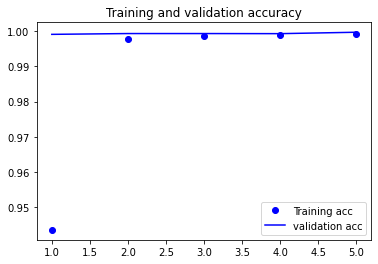

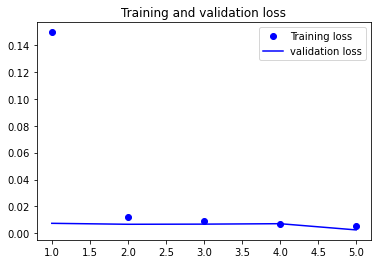

[0.007415393367409706, 0.006705252919346094, 0.006807667203247547, 0.007135504391044378, 0.002504836767911911]
5
0.9997138977050781 4
Epoch 1/5
308/308 [==============================] - 502s 2s/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9996
Epoch 2/5
308/308 [==============================] - 505s 2s/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.0077 - val_accuracy: 0.9995
Epoch 3/5
308/308 [==============================] - 508s 2s/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 4/5
308/308 [==============================] - 507s 2s/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 5/5
308/308 [==============================] - 506s 2s/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0030 - val_accuracy: 0.9997

CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1}
(1451, 1)
(148451, 1)
(1451, 50, 9)
(148451, 50, 9)
测试集上

In [11]:
train_and_test('Fuzzy_train_final_1.csv','Fuzzy_test_final_1.csv','Fuzzy_final_1.h5')


CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1}
(314951, 1)
(34951, 1)
(314951, 50, 9)
(34951, 50, 9)
Starting training 
Epoch 1/3
308/308 [==============================] - 708s 2s/step - loss: 0.0404 - accuracy: 0.9823 - val_loss: 2.0352e-07 - val_accuracy: 1.0000
Epoch 2/3
308/308 [==============================] - 641s 2s/step - loss: 2.9231e-05 - accuracy: 1.0000 - val_loss: 1.7224e-10 - val_accuracy: 1.0000
Epoch 3/3
308/308 [==============================] - 637s 2s/step - loss: 8.0146e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


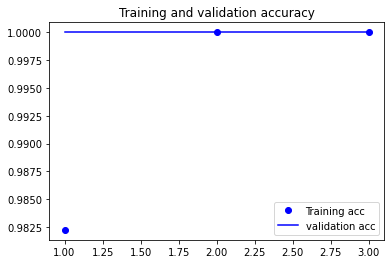

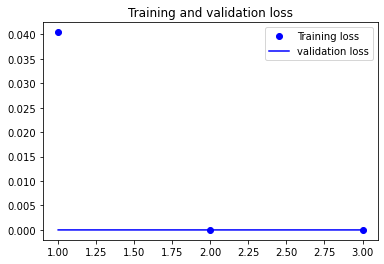

[2.0352165108761255e-07, 1.7224316417596697e-10, 0.0]
3
1.0 2
Epoch 1/3
308/308 [==============================] - 634s 2s/step - loss: 1.0387e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
308/308 [==============================] - 635s 2s/step - loss: 2.2194e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
308/308 [==============================] - 620s 2s/step - loss: 6.1015e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1}
(1451, 1)
(148451, 1)
(1451, 50, 9)
(148451, 50, 9)
测试集上的loss和acc：
[0.0, 1.0]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    117867
           1     1.0000    1.0000    1.0000     30584

    accuracy                         1.0000    148451
   macro avg     1.0000    1.0000    1.0000    148451
weighted avg     1.0000    1.0000    1

In [20]:
train_and_test('DoS_train_final_1.csv','DoS_test_final_1.csv','DoS_final_1.h5')


CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1}
(314951, 1)
(34951, 1)
(314951, 50, 9)
(34951, 50, 9)
Starting training 
Epoch 1/5
308/308 [==============================] - 552s 2s/step - loss: 0.0933 - accuracy: 0.9662 - val_loss: 1.3963e-05 - val_accuracy: 1.0000
Epoch 2/5
308/308 [==============================] - 534s 2s/step - loss: 0.0231 - accuracy: 0.9980 - val_loss: 1.9125e-04 - val_accuracy: 0.9999
Epoch 3/5
308/308 [==============================] - 535s 2s/step - loss: 0.0372 - accuracy: 0.9975 - val_loss: 2.0234e-07 - val_accuracy: 1.0000
Epoch 4/5
308/308 [==============================] - 538s 2s/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 2.3517e-09 - val_accuracy: 1.0000
Epoch 5/5
308/308 [==============================] - 539s 2s/step - loss: 0.0146 - accuracy: 0.9989 - val_loss: 3.3785e-08 - val_accuracy: 1.0000


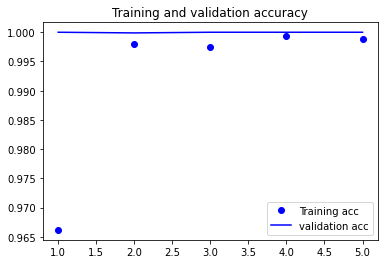

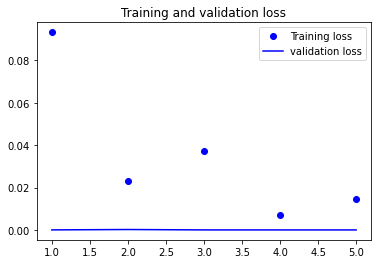

[1.396289371768944e-05, 0.00019125224207527936, 2.0233946429470961e-07, 2.3517245928417196e-09, 3.37845911246859e-08]
5
1.0 4
Epoch 1/5
308/308 [==============================] - 538s 2s/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 8.9908e-09 - val_accuracy: 1.0000
Epoch 2/5
308/308 [==============================] - 538s 2s/step - loss: 0.0136 - accuracy: 0.9990 - val_loss: 4.7616e-09 - val_accuracy: 1.0000
Epoch 3/5
308/308 [==============================] - 537s 2s/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 2.2761e-08 - val_accuracy: 1.0000
Epoch 4/5
308/308 [==============================] - 538s 2s/step - loss: 7.9174e-04 - accuracy: 0.9999 - val_loss: 4.2634e-11 - val_accuracy: 1.0000
Epoch 5/5
308/308 [==============================] - 538s 2s/step - loss: 3.3335e-04 - accuracy: 1.0000 - val_loss: 4.6045e-11 - val_accuracy: 1.0000

CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1}
(1451, 1)
(148451, 1)
(1451, 50, 9)


In [16]:
train_and_test('SpoofingGEAR3_train_final_1.csv','SpoofingGEAR3_test_final_1.csv','SpoofingGEAR3_final_1.h5')


CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1, 'T2': 2, 'T3': 3}
(809951, 4)
(89951, 4)
(809951, 50, 16)
(89951, 50, 16)
Starting training 
Epoch 1/5
791/791 [==============================] - 1808s 2s/step - loss: 0.0176 - accuracy: 0.9863 - val_loss: 0.0011 - val_accuracy: 0.9992
Epoch 2/5
791/791 [==============================] - 1385s 2s/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 2.8427e-04 - val_accuracy: 0.9998
Epoch 3/5
791/791 [==============================] - 1629s 2s/step - loss: 7.7160e-04 - accuracy: 0.9996 - val_loss: 5.5367e-06 - val_accuracy: 1.0000
Epoch 4/5
791/791 [==============================] - 1549s 2s/step - loss: 5.9278e-04 - accuracy: 0.9997 - val_loss: 9.1835e-05 - val_accuracy: 0.9999
Epoch 5/5
791/791 [==============================] - 1551s 2s/step - loss: 5.8390e-04 - accuracy: 0.9998 - val_loss: 5.3743e-06 - val_accuracy: 1.0000


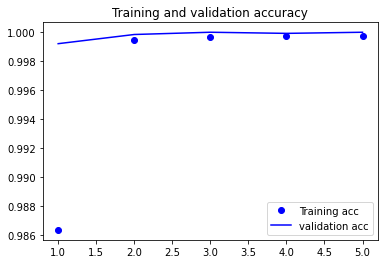

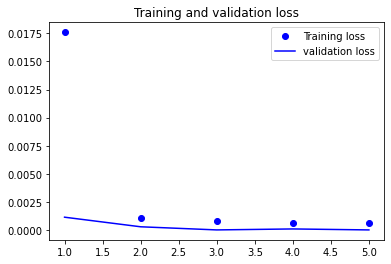

[0.0011379983043298125, 0.0002842662506736815, 5.536742264666827e-06, 9.183496149489656e-05, 5.374267402658006e-06]
5
1.0 4
Epoch 1/5
791/791 [==============================] - 1309s 2s/step - loss: 5.4098e-04 - accuracy: 0.9998 - val_loss: 3.1376e-06 - val_accuracy: 1.0000
Epoch 2/5
791/791 [==============================] - 1317s 2s/step - loss: 4.5296e-04 - accuracy: 0.9998 - val_loss: 3.5620e-05 - val_accuracy: 1.0000
Epoch 3/5
791/791 [==============================] - 1316s 2s/step - loss: 4.7661e-04 - accuracy: 0.9998 - val_loss: 4.7863e-04 - val_accuracy: 0.9997
Epoch 4/5
791/791 [==============================] - 1313s 2s/step - loss: 4.7630e-04 - accuracy: 0.9998 - val_loss: 2.6851e-06 - val_accuracy: 1.0000
Epoch 5/5
791/791 [==============================] - 1312s 2s/step - loss: 4.0684e-04 - accuracy: 0.9998 - val_loss: 1.0256e-06 - val_accuracy: 1.0000

CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1, 'T2': 2, 'T3': 3}
(29

In [13]:
print("\nCAN dataset using Keras/TensorFlow ")
np.random.seed(4)
tf.random.set_seed(13)

file1='multiply_train_final_1.csv'
file2='multiply_test_final_1.csv'
model1='multiply_final_1.h5'
# 1. 读取CSV数据集
print("Loading CAN data into memory")
CSV_FILE_PATH = file1
train_x, val_x, train_y, val_y, Class_dict = load_data(CSV_FILE_PATH, 0.9, 0.1)
#train_x = train_x.values.reshape(train_x.shape[0],1,16)
#val_x = val_x.values.reshape(val_x.shape[0],1,16)
train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                            31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
print(train_y.shape)
val_y=val_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                   train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                       train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                       train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                       train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                       train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                       train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                       train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                       train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                       train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
print(val_y.shape)
train_x = series_to_supervised(train_x, 49)
val_x = series_to_supervised(val_x, 49)
train_x = train_x.values.reshape(train_x.shape[0],50,9)
print(train_x.shape)
val_x = val_x.values.reshape(val_x.shape[0],50,9)
print(val_x.shape)


# 2. 定义模型
init = K.initializers.glorot_uniform(seed=1)
simple_adam = K.optimizers.Adam()
model = K.models.Sequential()
model.add(LSTM(units=256,input_shape=(50, 9),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_initializer=init, activation='linear'))
model.add(Dense(4,activation='softmax'))
#model.add(Activation('tanh'))
#model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
#model.add(K.layers.Dense(units=2, kernel_initializer=init, activation='sigmoid'))
#model.compile(loss='categorical_crossentropy', optimizer=simple_adam, metrics=['accuracy'])'''
#rmsprop = RMSprop(lr=0.01)
#model.compile(loss='mae', optimizer='rmsprop', metrics=['accuracy',TP,TN,FP,FN])
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#print(model.summary())
# 3. 训练模型
b_size = 1024
max_epochs = 5
# max_epochs = 2
history = LossHistory()
print("Starting training ")
h = model.fit(train_x, train_y, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1,callbacks=[history], validation_data=(val_x, val_y))

# 展示训练结果
import matplotlib.pyplot as plt
acc = h.history['accuracy']
loss = h.history['loss']
val_acc = h.history['val_accuracy']
val_loss = h.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 根据验证集最小损失确定迭代轮数，确定并保存模型
print(val_loss)
print(len(val_loss))
min_num = val_loss[0]
min_index = 0
for i in range(len(val_loss)):
    if val_loss[i] < min_num:
        min_num = val_acc[i]
        min_index = i

print(min_num,min_index)

h = model.fit(train_x, train_y, batch_size=b_size, epochs=min_index+1, shuffle=True, verbose=1,callbacks=[history], validation_data=(val_x, val_y))
model.save(model1)

# 测试，展示测试结果
# 为了和网站匹配及展示的方便，使用刚刚保存的模型
from keras.models import load_model
# 0. 开始
print("\nCAN dataset using Keras/TensorFlow ")
np.random.seed(4)
tf.random.set_seed(13)

# 1. 读取CSV数据集
print("Loading CAN data into memory")
CSV_FILE_PATH = file2
train_x, test_x, train_y, test_y, Class_dict = load_data(CSV_FILE_PATH, 0.01, 0.99)
#train_x = train_x.values.reshape(train_x.shape[0],1,16)
#test_x = test_x.values.reshape(test_x.shape[0],1,16)
train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                            31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
print(train_y.shape)
test_y=test_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                   train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                       train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                       train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                       train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                       train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                       train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                       train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                       train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                       train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
print(test_y.shape)
train_x = series_to_supervised(train_x, 49)
test_x = series_to_supervised(test_x, 49)
train_x = train_x.values.reshape(train_x.shape[0],50,9)
print(train_x.shape)
test_x = test_x.values.reshape(test_x.shape[0],50,9)
print(test_x.shape)


# 加载刚刚保存的模型
final_model = load_model(model1)
# 测试模型的结果
eval2 = final_model.evaluate(test_x, test_y, verbose=0)
print('测试集上的loss和acc：')
print(eval2)

from keras.models import load_model
predictions = final_model.predict(test_x)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y.values.argmax(axis=-1), predictions.argmax(axis=-1))
print(confusion_matrix)

In [14]:
confusion_matrix(test_y.values.argmax(axis=-1), predictions.argmax(axis=-1))

array([[247339,      7,      1,      0],
       [     5,  15298,      0,      0],
       [     0,      1,  18227,      0],
       [     1,      0,      0,  16072]], dtype=int64)


CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1, 'T2': 2, 'T3': 3}
(809951, 4)
(89951, 4)
(809951, 50, 9)
(89951, 50, 9)
Starting training 
Epoch 1/5
791/791 [==============================] - 1337s 2s/step - loss: 0.0182 - accuracy: 0.9870 - val_loss: 3.6451e-05 - val_accuracy: 1.0000
Epoch 2/5
791/791 [==============================] - 1350s 2s/step - loss: 0.0014 - accuracy: 0.9992 - val_loss: 7.2468e-06 - val_accuracy: 1.0000
Epoch 3/5
791/791 [==============================] - 1349s 2s/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 5.4261e-06 - val_accuracy: 1.0000
Epoch 4/5
791/791 [==============================] - 1350s 2s/step - loss: 7.3894e-04 - accuracy: 0.9997 - val_loss: 1.0872e-05 - val_accuracy: 1.0000
Epoch 5/5
791/791 [==============================] - 1352s 2s/step - loss: 5.0387e-04 - accuracy: 0.9998 - val_loss: 2.0649e-07 - val_accuracy: 1.0000


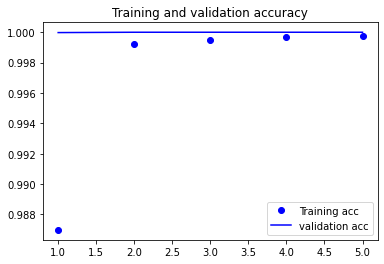

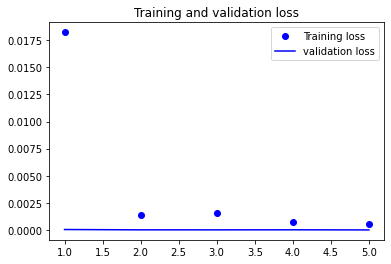

[3.645053584477864e-05, 7.246826498885639e-06, 5.426089501270326e-06, 1.087162581825396e-05, 2.0648936072120705e-07]
5
1.0 4
Epoch 1/5
791/791 [==============================] - 1353s 2s/step - loss: 8.9158e-04 - accuracy: 0.9997 - val_loss: 8.8205e-07 - val_accuracy: 1.0000
Epoch 2/5
791/791 [==============================] - 1364s 2s/step - loss: 4.0657e-04 - accuracy: 0.9998 - val_loss: 9.8372e-07 - val_accuracy: 1.0000
Epoch 3/5
791/791 [==============================] - 1357s 2s/step - loss: 3.9128e-04 - accuracy: 0.9998 - val_loss: 3.5973e-07 - val_accuracy: 1.0000
Epoch 4/5
791/791 [==============================] - 1361s 2s/step - loss: 7.9958e-04 - accuracy: 0.9998 - val_loss: 2.6989e-07 - val_accuracy: 1.0000
Epoch 5/5
791/791 [==============================] - 1363s 2s/step - loss: 5.3331e-04 - accuracy: 0.9998 - val_loss: 2.5694e-07 - val_accuracy: 1.0000

CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1, 'T2': 2, 'T3': 3}
(2

In [14]:
print("\nCAN dataset using Keras/TensorFlow ")
np.random.seed(4)
tf.random.set_seed(13)

file1='multiply_train_final.csv'
file2='multiply_test_final.csv'
model1='multiply_final.h5'
# 1. 读取CSV数据集
print("Loading CAN data into memory")
CSV_FILE_PATH = file1
train_x, val_x, train_y, val_y, Class_dict = load_data(CSV_FILE_PATH, 0.9, 0.1)
#train_x = train_x.values.reshape(train_x.shape[0],1,16)
#val_x = val_x.values.reshape(val_x.shape[0],1,16)
train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                            31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
print(train_y.shape)
val_y=val_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                   train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                       train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                       train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                       train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                       train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                       train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                       train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                       train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                       train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
print(val_y.shape)
train_x = series_to_supervised(train_x, 49)
val_x = series_to_supervised(val_x, 49)
train_x = train_x.values.reshape(train_x.shape[0],50,9)
print(train_x.shape)
val_x = val_x.values.reshape(val_x.shape[0],50,9)
print(val_x.shape)


# 2. 定义模型
init = K.initializers.glorot_uniform(seed=1)
simple_adam = K.optimizers.Adam()
model = K.models.Sequential()
model.add(LSTM(units=256,input_shape=(50, 9),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_initializer=init, activation='linear'))
model.add(Dense(4,activation='softmax'))
#model.add(Activation('tanh'))
#model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
#model.add(K.layers.Dense(units=2, kernel_initializer=init, activation='sigmoid'))
#model.compile(loss='categorical_crossentropy', optimizer=simple_adam, metrics=['accuracy'])'''
#rmsprop = RMSprop(lr=0.01)
#model.compile(loss='mae', optimizer='rmsprop', metrics=['accuracy',TP,TN,FP,FN])
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#print(model.summary())
# 3. 训练模型
b_size = 1024
max_epochs = 5
# max_epochs = 2
history = LossHistory()
print("Starting training ")
h = model.fit(train_x, train_y, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1,callbacks=[history], validation_data=(val_x, val_y))

# 展示训练结果
import matplotlib.pyplot as plt
acc = h.history['accuracy']
loss = h.history['loss']
val_acc = h.history['val_accuracy']
val_loss = h.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 根据验证集最小损失确定迭代轮数，确定并保存模型
print(val_loss)
print(len(val_loss))
min_num = val_loss[0]
min_index = 0
for i in range(len(val_loss)):
    if val_loss[i] < min_num:
        min_num = val_acc[i]
        min_index = i

print(min_num,min_index)

h = model.fit(train_x, train_y, batch_size=b_size, epochs=min_index+1, shuffle=True, verbose=1,callbacks=[history], validation_data=(val_x, val_y))
model.save(model1)

# 测试，展示测试结果
# 为了和网站匹配及展示的方便，使用刚刚保存的模型
from keras.models import load_model
# 0. 开始
print("\nCAN dataset using Keras/TensorFlow ")
np.random.seed(4)
tf.random.set_seed(13)

# 1. 读取CSV数据集
print("Loading CAN data into memory")
CSV_FILE_PATH = file2
train_x, test_x, train_y, test_y, Class_dict = load_data(CSV_FILE_PATH, 0.01, 0.99)
#train_x = train_x.values.reshape(train_x.shape[0],1,16)
#test_x = test_x.values.reshape(test_x.shape[0],1,16)
train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                            31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
print(train_y.shape)
test_y=test_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                   train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                       train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                       train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                       train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                       train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                       train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                       train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                       train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                       train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
print(test_y.shape)
train_x = series_to_supervised(train_x, 49)
test_x = series_to_supervised(test_x, 49)
train_x = train_x.values.reshape(train_x.shape[0],50,9)
print(train_x.shape)
test_x = test_x.values.reshape(test_x.shape[0],50,9)
print(test_x.shape)


# 加载刚刚保存的模型
final_model = load_model(model1)
# 测试模型的结果
eval2 = final_model.evaluate(test_x, test_y, verbose=0)
print('测试集上的loss和acc：')
print(eval2)

from keras.models import load_model
predictions = final_model.predict(test_x)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y.values.argmax(axis=-1), predictions.argmax(axis=-1))
print(confusion_matrix)

In [15]:
confusion_matrix(test_y.values.argmax(axis=-1), predictions.argmax(axis=-1))

array([[247345,      2,      0,      0],
       [    13,  15290,      0,      0],
       [     0,      3,  18225,      0],
       [     0,      0,      2,  16071]], dtype=int64)

In [15]:
predictions[1300:1400]

array([[9.99998689e-01, 1.37070106e-06, 1.83604827e-14, 3.42021272e-11],
       [9.99997139e-01, 2.89298850e-06, 5.99805240e-14, 1.02045643e-10],
       [9.99998927e-01, 1.08378470e-06, 1.63345798e-14, 2.50109360e-11],
       [9.99998569e-01, 1.42238537e-06, 2.50450194e-14, 3.56343809e-11],
       [9.99998927e-01, 1.03513537e-06, 1.31235507e-14, 1.96850002e-11],
       [9.99995947e-01, 3.99619285e-06, 9.42297591e-14, 1.65433223e-10],
       [6.23848318e-05, 9.99937654e-01, 7.30952590e-11, 1.60399560e-09],
       [4.40976328e-05, 9.99955893e-01, 3.54236050e-11, 7.38967942e-10],
       [3.69226000e-05, 9.99963045e-01, 3.07251655e-11, 6.07519701e-10],
       [4.37052659e-05, 9.99956250e-01, 6.19128915e-11, 1.31409583e-09],
       [9.99992013e-01, 8.04414231e-06, 8.88535597e-14, 8.23711307e-11],
       [8.11629798e-05, 9.99918818e-01, 1.05336732e-10, 1.73386683e-09],
       [9.99953985e-01, 4.59597068e-05, 8.43973275e-13, 9.09115949e-10],
       [9.99983907e-01, 1.61110074e-05, 1.19233657e

In [19]:
predictions[103000:104000].argmax(axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,

In [21]:
test_y[103000:104000].values.argmax(axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,

In [7]:
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
from keras.layers import LSTM, Dense, Activation,Input,core,Dropout
from keras.models import Model
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from keras.models import load_model

print("\nCAN dataset using Keras/TensorFlow ")
np.random.seed(4)
tf.random.set_seed(13)

file1='multiply_train_final.csv'
file2='multiply_test_final.csv'
model1='multiply_final.h5'
# 1. 读取CSV数据集
print("Loading CAN data into memory")
CSV_FILE_PATH = file2
train_x, test_x, train_y, test_y, Class_dict = load_data(CSV_FILE_PATH, 0.01, 0.99)
#train_x = train_x.values.reshape(train_x.shape[0],1,16)
#test_x = test_x.values.reshape(test_x.shape[0],1,16)
train_y=train_y.drop(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                            31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
print(train_y.shape)
test_y=test_y.drop(index=[train_x.shape[0]+0,train_x.shape[0]+1,train_x.shape[0]+2,train_x.shape[0]+3,train_x.shape[0]+4,
                   train_x.shape[0]+5,train_x.shape[0]+6,train_x.shape[0]+7,train_x.shape[0]+8,train_x.shape[0]+9,train_x.shape[0]+10,
                       train_x.shape[0]+11,train_x.shape[0]+12,train_x.shape[0]+13,train_x.shape[0]+14,train_x.shape[0]+15,
                       train_x.shape[0]+16,train_x.shape[0]+17,train_x.shape[0]+18,train_x.shape[0]+19,train_x.shape[0]+20,
                       train_x.shape[0]+21,train_x.shape[0]+22,train_x.shape[0]+23,train_x.shape[0]+24,train_x.shape[0]+25,
                       train_x.shape[0]+26,train_x.shape[0]+27,train_x.shape[0]+28,train_x.shape[0]+29,train_x.shape[0]+30,
                       train_x.shape[0]+31,train_x.shape[0]+32,train_x.shape[0]+33,train_x.shape[0]+34,train_x.shape[0]+35,
                       train_x.shape[0]+36,train_x.shape[0]+37,train_x.shape[0]+38,train_x.shape[0]+39,train_x.shape[0]+40,
                       train_x.shape[0]+41,train_x.shape[0]+42,train_x.shape[0]+43,train_x.shape[0]+44,train_x.shape[0]+45,
                       train_x.shape[0]+46,train_x.shape[0]+47,train_x.shape[0]+48])
print(test_y.shape)
train_x = series_to_supervised(train_x, 49)
test_x = series_to_supervised(test_x, 49)
train_x = train_x.values.reshape(train_x.shape[0],50,16)
print(train_x.shape)
test_x = test_x.values.reshape(test_x.shape[0],50,16)
print(test_x.shape)


# 加载刚刚保存的模型
final_model = load_model(model1)
# 测试模型的结果
eval2 = final_model.evaluate(test_x, test_y, verbose=0)
print('测试集上的loss和acc：')
print(eval2)
predictions = final_model.predict(test_x)
from sklearn.metrics import classification_report
print(classification_report(test_y.values, np.int64(predictions > 0.5),digits=4))


CAN dataset using Keras/TensorFlow 
Loading CAN data into memory
<class 'dict'>
{'T0': 0, 'T1': 1, 'T2': 2, 'T3': 3}
(2951, 4)
(296951, 4)
(2951, 50, 16)
(296951, 50, 16)
测试集上的loss和acc：
[0.00011285657819826156, 0.9999495148658752]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    247347
           1     0.9995    0.9997    0.9996     15303
           2     0.9999    0.9999    0.9999     18228
           3     1.0000    0.9999    1.0000     16073

   micro avg     0.9999    0.9999    0.9999    296951
   macro avg     0.9998    0.9999    0.9999    296951
weighted avg     0.9999    0.9999    0.9999    296951
 samples avg     0.9999    0.9999    0.9999    296951



In [1]:
from keras.models import load_model
one_model = load_model('multiply_final.h5')
one_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 256)           272384    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 128)           197120    
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               